## Data Exploration

Jee Hyun Kim, Taejin Kim

### Iteration Overview

In this iteration, we explore data using many different methods. We both check the structure of the data and the content of the data, heavily depending on visual aids. Overall, we attempt to visualize as much of the data as possible and have some insight on which components of the data sets we want to utilize and which we want to leave out.

### Sources

For this iteration, we utilized many different graphs and methods of organizing data presented in the sources below. All sources are from the Kaggle Script discussion board.

https://www.kaggle.com/wendykan/sf-crime/don-t-know-what-i-want-to-do-yet
The first source offers us basic methods to use Seaborn to visualize the data. Here, we focus on bigger groups of data. Most graphing methods deal with crime rates in different districts and different times of the day.

https://www.kaggle.com/dbennett/sf-crime/test-map/files
The second source has a image file of San Francisco. The code presented here helps us plot different categories of crime onto the map to see how different crimes occur in different areas of the city.

https://www.kaggle.com/sanghan/sf-crime/top-crimes-zones
The third source varies from the first source as most of the information presented takes form of bar graphs. Also, the information presented offers more insight to parts of the data not represented in the first source including crime descriptions, police department activity, crimes by days of the week, and resolutions of crimes.

https://www.kaggle.com/lllinger/sf-crime/crimedistribution-temporal-spatial/files
The fourth source mimics the first and the third in a way as it visuallizes data. This source includes data on hourly crime rates over different months, and crime trend in each districts. Crime trend in each district proves to be extremely helpful, as it offers insight in irregular trends in crime across different districts over the years.

### Importing Modules and Data

Initially, we import the San Francisco crime data set, and multiple modules to help us throughout the activity.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import seaborn as sns
import zipfile
from sklearn import preprocessing

/home/tj/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#importing train dataset
z_train = zipfile.ZipFile('train.csv.zip')
train = pd.read_csv(z_train.open('train.csv'))

###  Initial Observations of the Data Set

After we load the data set, we observe each of the columns to observe if there are any NaN values we must deal with, and just get the gist of what we are working with.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 67.0+ MB


All the entries for the train.csv are non-null values.
However, there might be NONE entries within the Category column. Overall, we believe that the data is thorough and reliable and not much modification needs to be done to get rid of NaN values. We run a similar check for the test data.

In [5]:
#importing test dataset
z_test = zipfile.ZipFile('test.csv.zip')
test = pd.read_csv(z_test.open('test.csv'))
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.0+ MB


All the entries for the test.csv are non-null values.

The short block of text below provides a short summary on each of the columns in the data set.

In [6]:
#importing map
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

ll_lon, ll_lat = -122.52469, 37.69862
ur_lon, ur_lat = -122.33663, 37.82986

In [7]:
#making list of data fields for test and train data
f_test = ['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
f = f_test + ['Category', 'Descript', 'Resolution']

In [8]:
train.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

Next, we observe the sub-categories in each column of the data. This step proves crucial as we do not want an excessive number of sub-categories in our columns used for regression, as too many variables may lead to a less accurate regression process.

In [9]:
print 'total no. of cases: ', len(train)
for field in f:
    if field in ['Id']:
        continue
    else:
        print 'no. of unique data in ' + field + ':', len(train[field].unique())

total no. of cases:  878049
no. of unique data in Dates: 389257
no. of unique data in DayOfWeek: 7
no. of unique data in PdDistrict: 10
no. of unique data in Address: 23228
no. of unique data in X: 34243
no. of unique data in Y: 34243
no. of unique data in Category: 39
no. of unique data in Descript: 879
no. of unique data in Resolution: 17


We observe that the supposedly core data columns with fewer sub categories includes DayOfWeek, PdDistrict, Category, and resolution. Description of the data seems to overlap with category greatly, and also has over 800 unique cases, which may mess with our regression accuracy. Address has over 20000 unique data points, and this may cause overfitting too.

Below, we expand on some of the key columns we want to further examine, Category and Resolution. We also observe the unique types in Descript just to see what types of data it holds.

In [10]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [11]:
train['Resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'], dtype=object)

In [12]:
train['Descript'].unique()

array(['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO',
       'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'FOUND PROPERTY',
       'ROBBERY, ARMED WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'TRAFFIC VIOLATION',
       'ROBBERY, BODILY FORCE', 'STAY AWAY OR COURT ORDER, NON-DV RELATED',
       'LOST PROPERTY', 'ATTEMPTED THEFT FROM LOCKED VEHICLE',
       'CIVIL SIDEWALKS, CITATION', 'MALICIOUS MISCHIEF, VANDALISM',
       'SUSPICIOUS PACKAGE', 'AIDED CASE, MENTAL DISTURBED',
       'PETTY THEFT SHOPLIFTING', 'PROBATION VIOLATION',
       'STAY AWAY ORDER VIOLATION, DV RELATED',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED', 'STOLEN MOTORCYCLE',
       'GRAND THEFT FROM PERSON', 'BURGLARY, VEHICLE (ARREST MADE)',
       'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE',
       'PETTY THEFT FROM A B

### Tools for Data Exploration

Some of the columns in the data set cause inconvenience for analysis. The extract_date function alters the Dates column in the data set to be used more conveniently. Previously, one column held all of year, month, day, and specific time, but now we divide it up. By doing this we can see trends in crime within different days, different years, and a lot of flexibility becomes available.

The second function, make_binary_features, allows us to create dummy variables with data from pre-existing columns. Dummy variables work extremely well with Random Forrest Regression, although the number of columns in the data set are increased.

In [13]:
 def extract_date(df):
    """
    function specifically for Dates field only
    creates new field 
    Year  YYYY
    Month MM
    Date  DD
    Time  HH:MM:SS
    """
    df['Year'] = df['Dates'].apply(lambda x: x[:4])
    df['Month'] = df['Dates'].apply(lambda x: x[5:7])
    df['Date'] = df['Dates'].apply(lambda x: x[8:10])
    df['Time'] = df['Dates'].apply(lambda x: x[-9:])
    return

def extract_time(df):
    """
    function specifically for Time field only
    creates new field 
    Hour   HH
    Minute MM
    Second SS
    """
    df['Hour'] = df['Time'].apply(lambda x: x[:3])
    df['Minute'] = df['Time'].apply(lambda x: x[4:6])
    df['Second'] = df['Time'].apply(lambda x: x[7:9])
    return

def make_binary_fields(df, field):
    """
    creates new field with field name as the name of data 
    if the original data match the new field name, the data will be 1
    if the original data does not match the new field name, the data will be 0

    
    ex 
    make_binary_field(df, 'DayOfWeek')
    will create new fields
    Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday
    where
    df['Monday'] will have value 1 for all Mondays and 0 for the rest
    """
    for new_field in df[field].unique():
        df[new_field] = df[field]
        df.loc[df[new_field] != new_field, new_field] = 0
        df.loc[df[new_field] == new_field, new_field] = 1
    return

In [14]:
extract_date (train)
extract_time (train)
make_binary_fields(train, 'DayOfWeek')
#make_binary_fields(train, 'PdDistrict')
train.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year   ...    Hour Minute Second Wednesday Tuesday  \
0 -122.425892  37.774599  2015   ...      23     53     00         1       0   
1 -122.425892  37.774599  2015   ...      23     53     00         1       0   
2 -122.424363  37.800414  2015   ...      23     33     00         1       0   
3 -122.426995  37.800873  2015   ...      23     30     00         1       0   
4 -122.438738  37.771541  2015   ...      23     30     00         1       0   

  Monday Sunday Saturday Friday Thursday  
0      0      0        0      0        0  
1      0      0        0      0        0  
2      0      0        0      0        0  
3      0      0        0      0        0  
4      0      0        0      0        0  

[5 rows x 23 columns]

### Mapping the Data on San Francisco

This portion of the data exploration mostly came from Source 2. We import a map picture of San Francisco and overlay different crimes filtered by different categories. Initially we load the map and map data, and set the boundaries of the map we want to observe. We set our longitude and latitude of the map limits.

After, we cut off the crime incidents in the data set that happen outside our cutoff range. Below, we graph our intial map, with every crime layered upon the map.

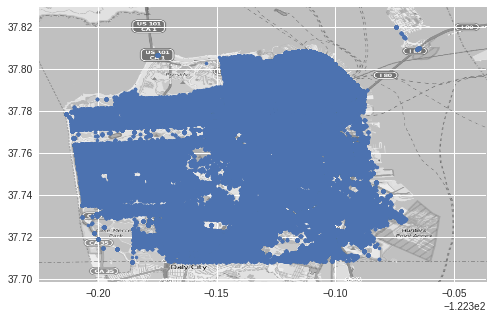

In [15]:
#cleaning data 
train['Xc'] = train[(train.X < ur_lon) & (train.X > ll_lon)].X
train['Yc'] = train[(train.Y < ur_lat) & (train.Y > ll_lat)].Y
train = train.dropna(subset = ['Xc', 'Yc'])

#plotting all datapoints
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[ll_lon, ur_lon, ll_lat, ur_lat], aspect=asp)
plt.plot(train['Xc'],train['Yc'],'.')
plt.axis([ll_lon, ur_lon, ll_lat, ur_lat])
plt.show()

In [16]:
def plot_on_map_by_fields(df, field):
    """
    function takes in dataframe(df) and the field
    and plots over the map after grouping by unique data in field
    """
    groups = df.groupby(field)
    i=1
    plt.figure(figsize=(30, 30))
    for name, group in groups:
        plt.subplot(8,5,i)
        histo, xedges, yedges = np.histogram2d(np.array(group.Xc),np.array(group.Yc), bins=(100, 100))
        myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
        plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[ll_lon, ur_lon, ll_lat, ur_lat], aspect=asp)
        plt.imshow(histo.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto',norm=LogNorm(), cmap = 'plasma')
        plt.title(name)
        i+=1
    return

In [17]:
"""
for field in f:
    if field in ['Id', 'Dates', 'Address', 'X', 'Y', 'Descript']:
        continue
    else:
        print 'Plot by ', field
        plot_on_map_by_fields(train, field)
"""

"\nfor field in f:\n    if field in ['Id', 'Dates', 'Address', 'X', 'Y', 'Descript']:\n        continue\n    else:\n        print 'Plot by ', field\n        plot_on_map_by_fields(train, field)\n"

First, we overlay different police districts on the map, and see which crimes eat police district deals with. Observing the maps below, we see the eat police district mainly remains in their area and does not venture too far. Due to the small unique sub-categories in the police districts, this category seems very useful in our regression process. However, due to the predictability in the data, the usefulness may decrease, as we know the area is heavily redundant with the district.

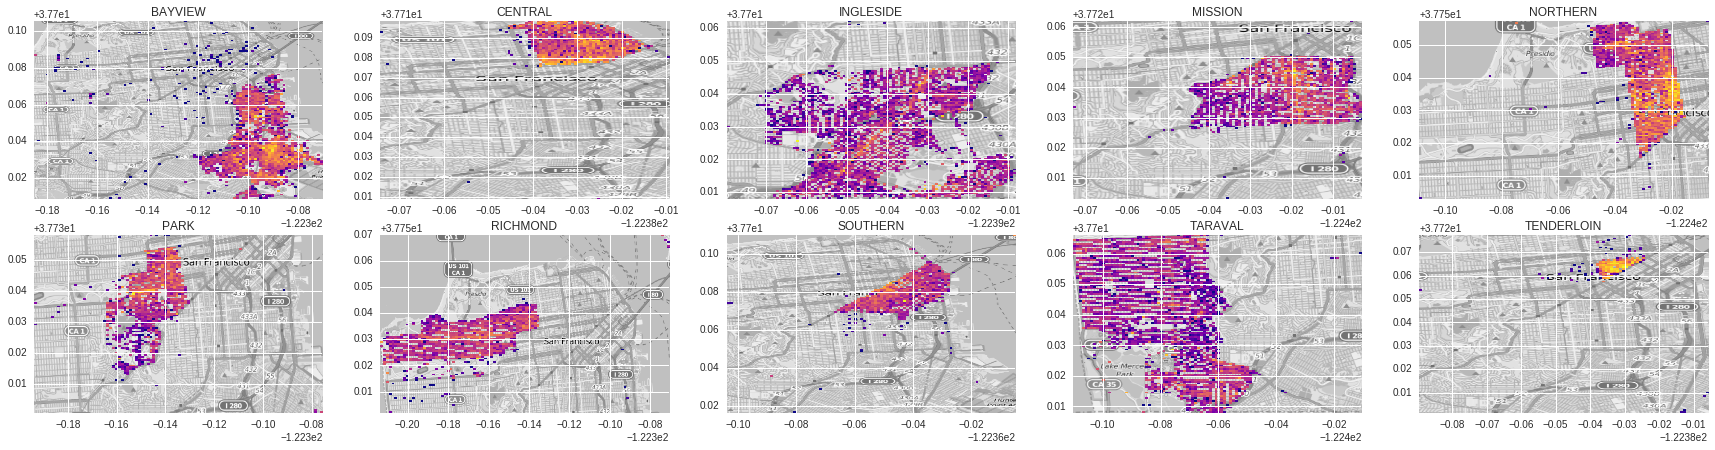

In [18]:
#to show that the function works
plot_on_map_by_fields(train, 'PdDistrict')

Second, we overlay the different crime categories on the map, and observe how different crimes happen across different parts of the city. Here we see lots of interesting facts, as specific crimes seem to be related to specific locations, while others, like car theft, is even throughout. Due to some visible trends here, and based upon our assumptions, the categories variable will be crucial in our regression.

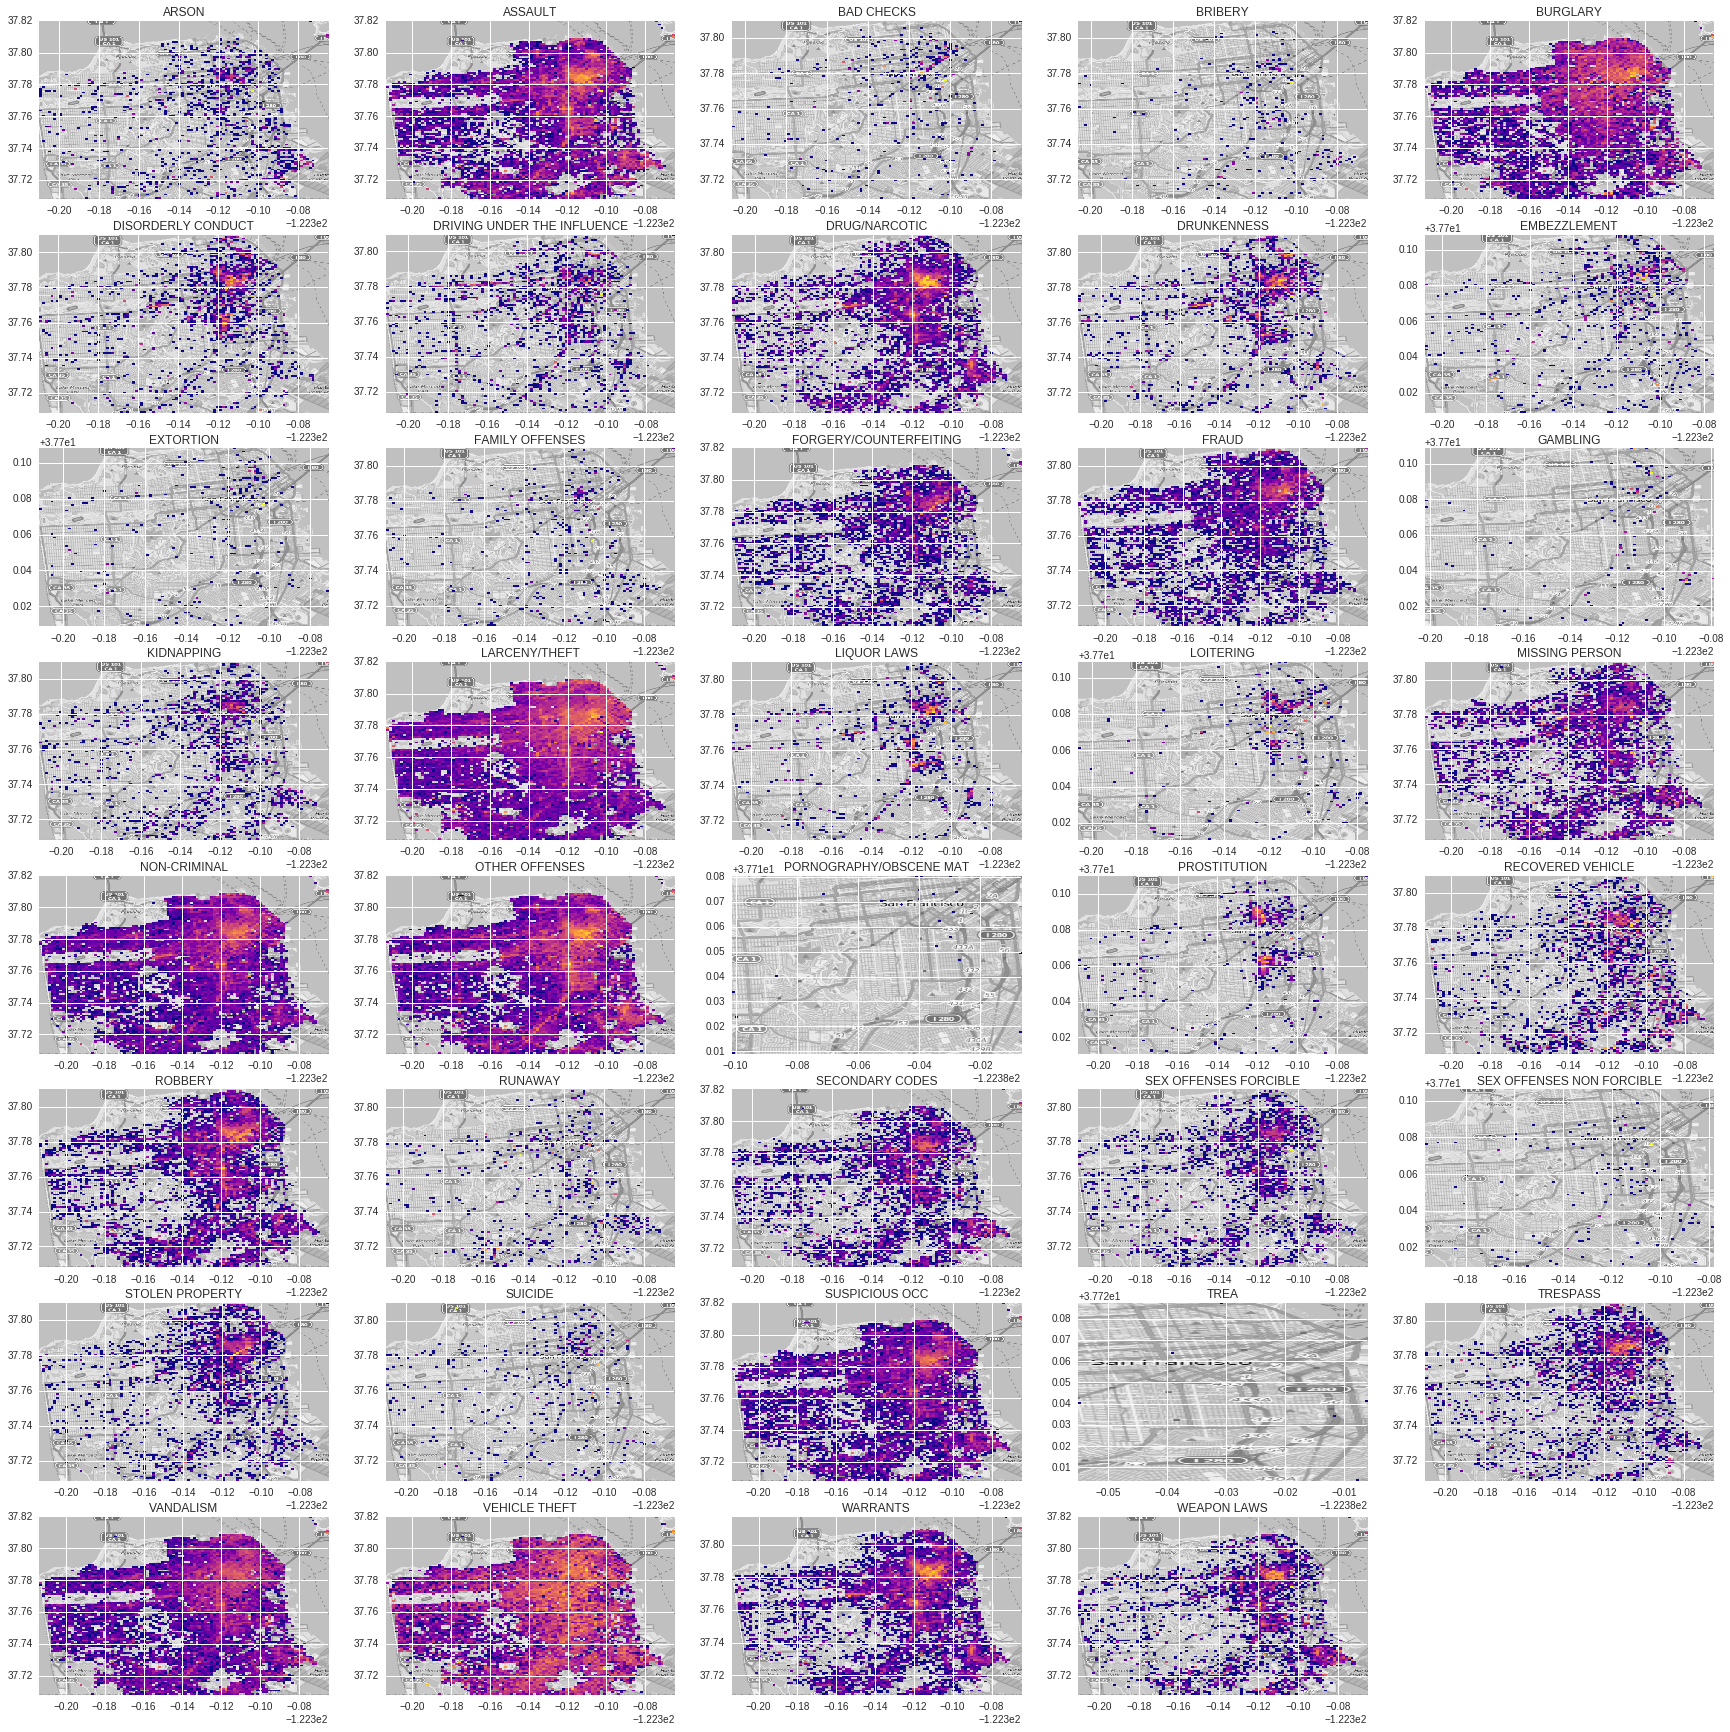

In [19]:
plot_on_map_by_fields(train, 'Category')

Lastly, we overlay crime resolutions types over the map. Although crime resolution is not given in our test data set and will not be useful in regression, the maps show that a lot of the crimes are unresolved and go unpunished. Either that, or lots of NaN values are present in this category. Gladly, as mentioned before, we will not be using this variable for regression.

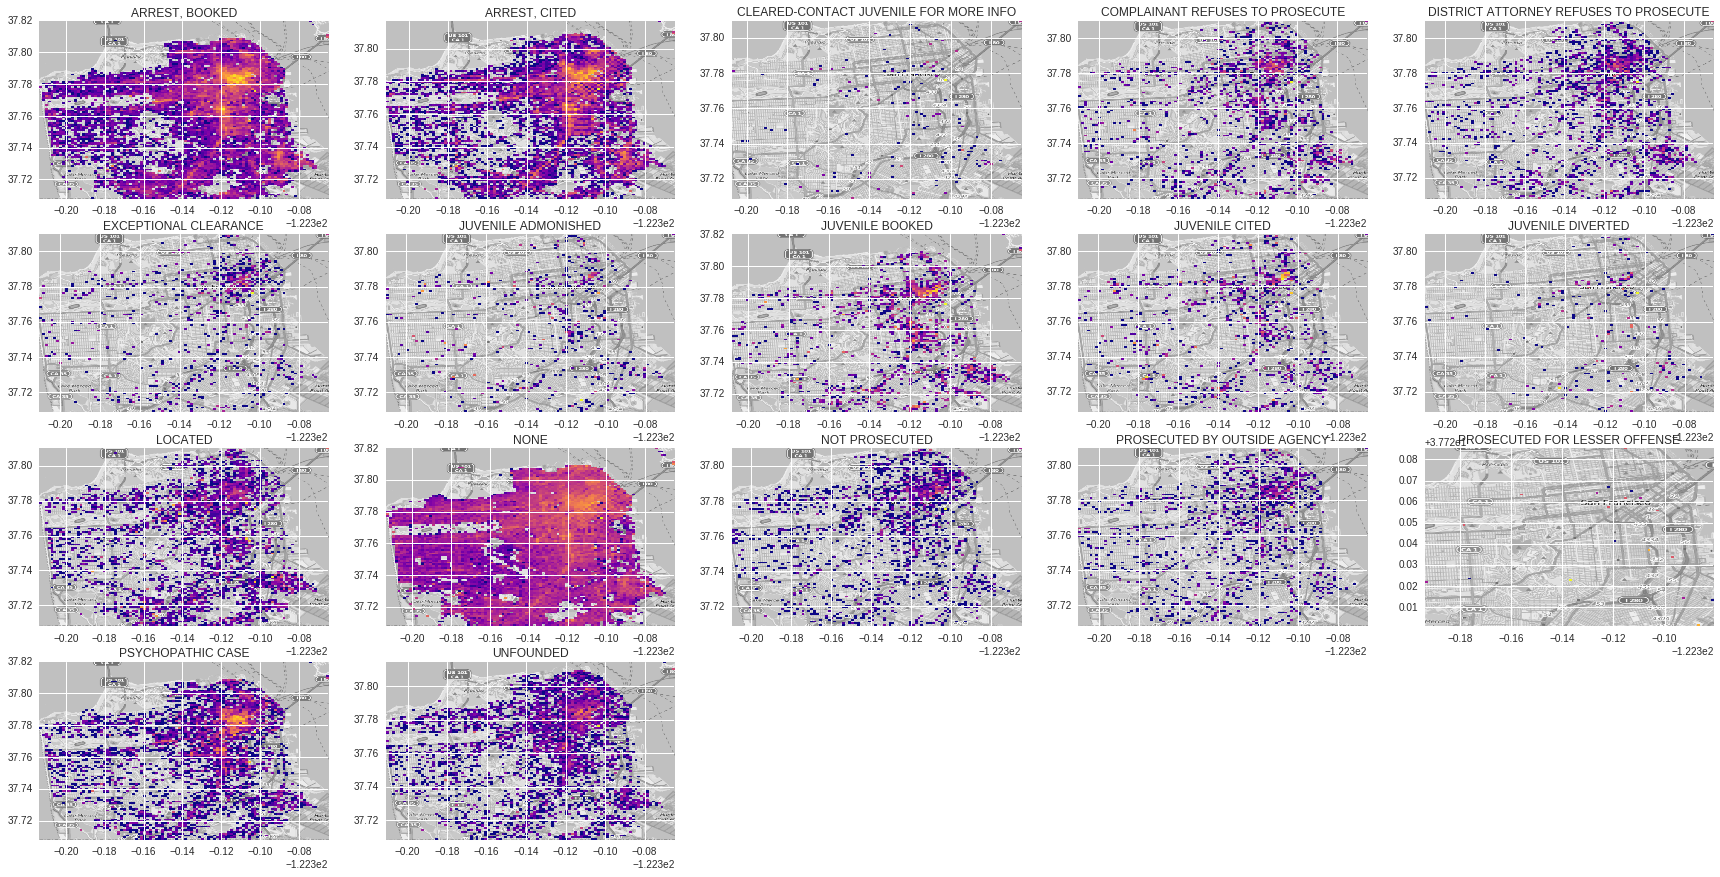

In [20]:
plot_on_map_by_fields(train, 'Resolution')

### Histograms and Line Graphs

With the mapping observations complete, we move on to observing different trends and correlations within the data. Here we utilize Seaborn to graph different categories and see if there are relations to crime rates. These include analysis on crimes per day, crimes during different hours of the day, different days of the week and so forth. Moreover, we observe different crime rates in districts.

In [21]:
colors = ('husl', 'coolwarm', 'RdYlGn', 'Greens', 'Blues')

def plot_histogram(df, field):
    df[field].value_counts().plot(kind='bar', figsize=(8,10), 
                                  title=('Number of Crimes by '+ field), 
                                  color = sns.color_palette(np.random.choice(colors), len(df[field].unique())))
    return

def plot_ordered_histogram(df, field):
    df['event']=1
    events = df[[field,'event']].groupby([field]).count().reset_index()
    events.plot(kind='bar', title=('Number of Crimes by '+ field))
    return

def plot_ordered_histogram2(df, field1, field2):
    """
    index: field1
    columns: field2
    """
    df['event']=1
    events = train[[field1, field2,'event']].groupby([field1, field2]).count().reset_index()
    events_pivot = events.pivot(index=field1, columns=field2, values='event').fillna(method='ffill')
    events_pivot.interpolate().plot(title=('number of cases by ' + field1 + ' & ' + field2), figsize=(15,10))

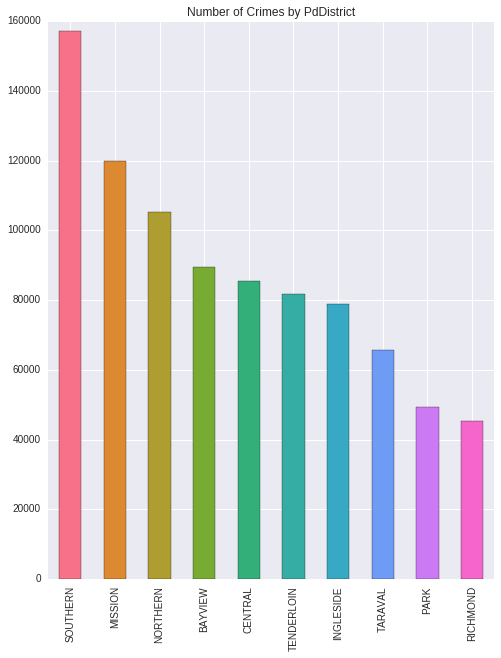

In [22]:
plot_histogram(train, 'PdDistrict')

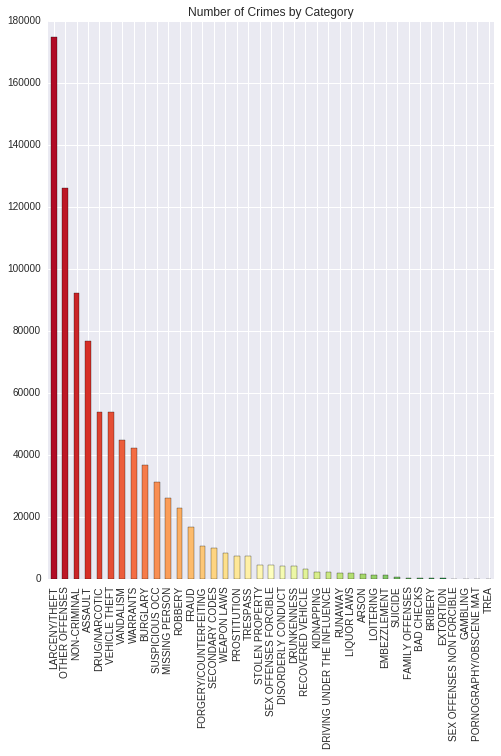

In [23]:
plot_histogram(train, 'Category')

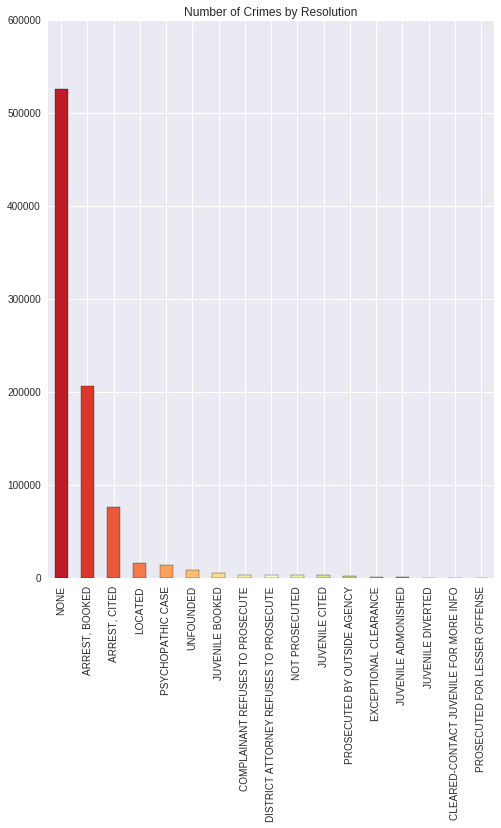

In [24]:
plot_histogram(train, 'Resolution')

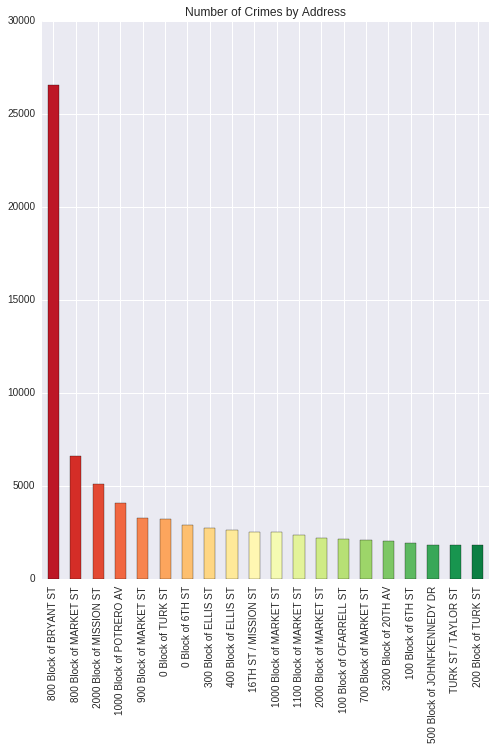

In [25]:
address_most_common=train[train['Address'].isin(train['Address'].value_counts().head(20).index)]
plot_histogram(address_most_common, 'Address')

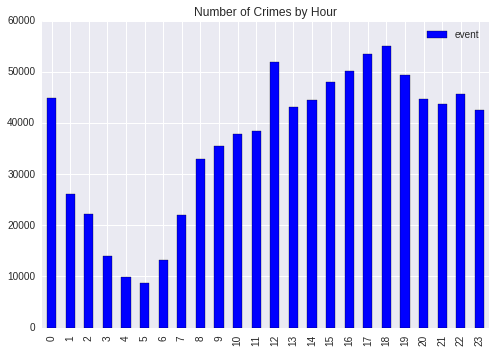

In [26]:
plot_ordered_histogram(train, 'Hour')

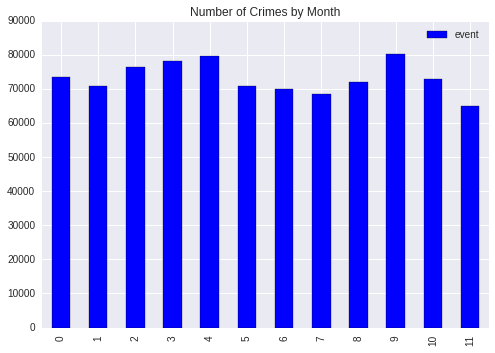

In [27]:
plot_ordered_histogram(train, 'Month')

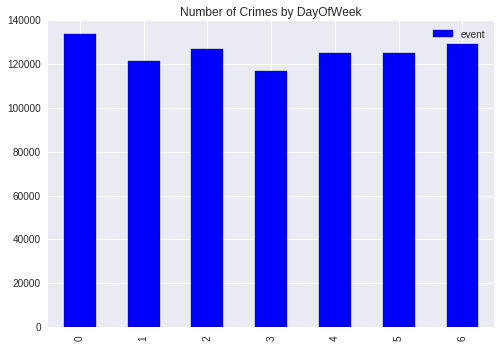

In [28]:
plot_ordered_histogram(train, 'DayOfWeek')

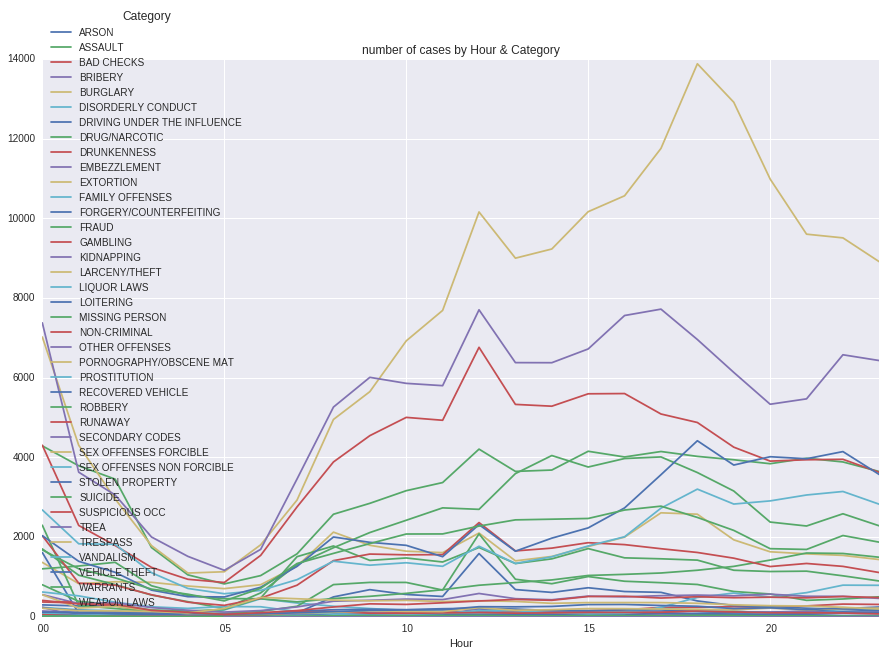

In [29]:
plot_ordered_histogram2(train, 'Hour', 'Category')

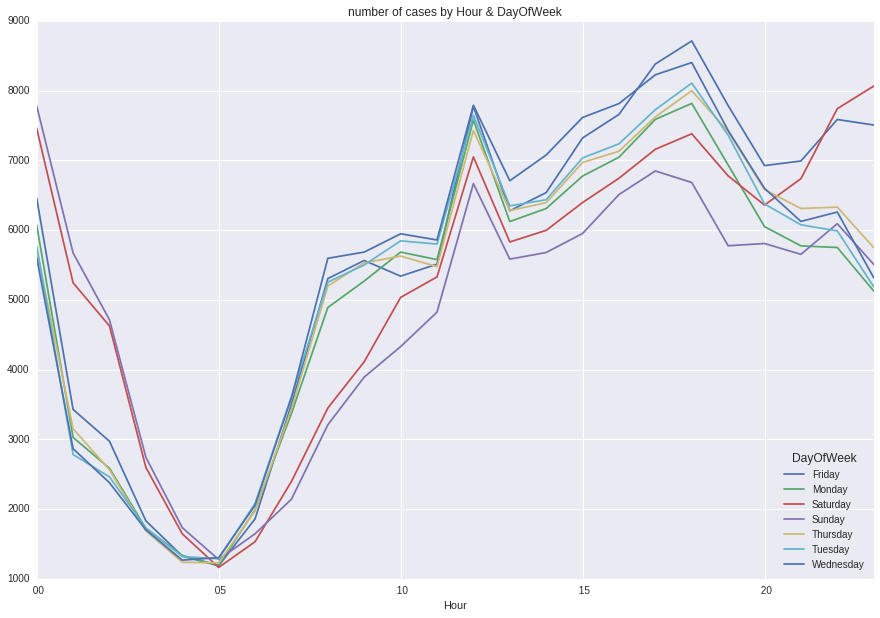

In [30]:
plot_ordered_histogram2(train, 'Hour', 'DayOfWeek')

After viewing the graphs presented below, it is obvious that there are some trends, some districts more crime heavy than others, some crime types specific to districts and so on. The data columns of crime type, the different components of time, and area, seem to have many relations with each other over time. The stories told by these graphs indicate a correlation, and will aid in our regression process.